# Project: Investigate a Dataset (The Movie Database)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**In this project, we will be analyzing data collected overtime for movies produced to see which movies have generated the highest revenue as well as the company affiliated with the highest revenue from film production. Since different movies are classified under different genres, it is worthy to see the most popular genre that has the maximum number of movies associated with them and the genre with the least number of movies.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format="{:,.5f}".format #to help convert exponents to float point as learnt from Texas Mccombs school of business

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [6]:
df=pd.read_csv('tmdb-movies.csv') #to read the data from the csv file downloaded

In [7]:
df.head(100) #to view the first 5 rows of the data set


,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.98576,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50000,2015,"137,999,939.28003","1,392,445,892.52380"
1,tt1392190,28.41994,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.10000,2015,"137,999,939.28003","348,161,292.48903"
2,tt2908446,13.11251,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.30000,2015,"101,199,955.47202","271,619,025.40763"
3,tt2488496,11.17310,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.50000,2015,"183,999,919.04004","1,902,723,129.80182"
4,tt2820852,9.33501,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.30000,2015,"174,799,923.08803","1,385,748,801.47052"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,tt2974918,1.84178,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,Walt Becker,chipmunk|cgi|talking animal|aftercreditsstinge...,92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,2015-12-17,278,5.70000,2015,0.00000,"215,055,014.13579"
96,tt2910904,1.82313,11930000,18340000,The Dressmaker,Kate Winslet|Liam Hemsworth|Caroline Goodall|J...,Jocelyn Moorhouse,based on novel|australia|dressmaker|hometown|w...,118,Drama,Amazon Studios|Film Art Media|Apollo Media,2015-10-01,197,6.90000,2015,"10,975,595.17074","16,872,792.57597"
97,tt1666801,1.75862,8500000,43528634,The DUFF,Mae Whitman|Robbie Amell|Bella Thorne|Bianca A...,Ari Sandel,high school|teenager|popularity|high school se...,100,Romance|Comedy,Wonderland Sound and Vision|CBS Films|Vast Ent...,2015-02-20,753,6.80000,2015,"7,819,996.55920","40,046,325.65962"
98,tt2752772,1.74229,10000000,52882018,Sinister 2,Shannyn Sossamon|James Ransone|Tate Ellington|...,Ciaran Foy,haunted house|sequel|twins,97,Horror,Alliance Films|Blumhouse Productions|IM Global...,2015-08-19,331,5.50000,2015,"9,199,995.95200","48,651,435.15337"


# **In the data, the rows consists of both numerical and categorical variables.**

**We have the id of the movie as well as the internet movie database id.**

**The popularity of the movie as determined by the users.**

**The budget available to produce the movie.**

**The revenue generated after production of the movie.**

**The movie's original title as well as the cast that featured in the movie**

**A website link showing where the movie can be accessed for viewer's**

**The director of the movie, the runtime in minutes, genres, production company, release date, voter's count and vote average**

**Year of release as well as the adjusted budget and adjusted revenue generated over time to cater for inflation**

In [ ]:
df.shape

**There are 8664 rows and 17 columns in the data set**

In [ ]:
df.describe().T #Descriptive statistical summary of all the numerical variables where the column and rows have been transposed for easier readability

**The mean runtime of movies (103.8) is higher than the median runtime of movies (100.00) indicative of a data set that is slightly skewed to the right.**

**There exist one or more movies with a runtime of about 705 minutes, this can only be indicative of a seasonal movie or a series of short episodes**

**Based on release year, the oldest movie appears to have been released in 1960 while the most recent movie(s) we released in year 2015 and the average release date of all movies is around year 2000**

**Over 50% of the movies were released from 2004 onwards**

**The average revenue generated for all movies was around 49.2million while the maximum revenue for a single movie was around 2.78billion**

**Due to inflation that could arise over years, the mean budget was seen to have been adjusted for movies by about 3.7million while the cap for budget adjustment was still maintained at 425 million.**



In [ ]:
df.describe(include='all').T #descriptive statistical summary of both numerical and categorical variable where the column and rows have been transposed for easier readability#

In [ ]:
df.info() #to check the categorization of the data set

**From the information above, imdb_id has some missing values**

**cast has some missing values,homepage, director, tagline,keywords,overview,genres, production_companies all have missing values**

In [ ]:
df.duplicated().sum()


### Data Cleaning(Removal of columns not neccesary for analysis as well as treating missing and duplicated values)

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])

**The code above converts release_date to a suitable date time format**

In [ ]:
df.drop(['id','homepage','tagline','overview'], axis=1, inplace=True) #to drop columns not necessary in this analysis

In [ ]:
df.head()#to confirm the rows not needed were sucessfully dropped

In [ ]:
df.info()

In [ ]:
df.drop_duplicates(inplace=True) # drop duplicates and keep new dataframe

In [ ]:
df.duplicated().sum()

**At this stage, there are no duplicated data in the data set**


**Knowing that columns such as imdb_id, cast,director,keywords, genres and production companies contain null vaues, dropping the null values makes it easier for the analysis of an already large data set.**

In [ ]:
df[df.genres.isnull()] 

In [ ]:
df[df.imdb_id.isnull()]

In [ ]:
df.dropna(inplace=True) # to clean the data set for uniformity, all null values have been dropped

In [ ]:
df.to_csv('tmdb-movies.csv', index=False) # to save new data frame to csv file

In [ ]:
df.info() #to check if all null values have been dropped.

In [ ]:
df.isnull().sum() #sum of all null values#

**This confirms that there are no null values in the data set and we can start exploratory data analysis**

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



### How many unique directors were involved in the production of all movies from 1960 till date?


In [ ]:
df['director'].nunique()

**A total of 3951 unique directors across board**

### How many categories of genres were considered in the data set?

In [ ]:
df['genres'].nunique()

**A total of1784 different genres**

### which of the genre(s) had the maximun number of movies associated/produced for them and which genre(s) had the least?

In [ ]:
print(df['genres'].max())
print(df['genres'].min())

**The most popular genre in the collection is the western thriller and the least popular genre is the Action movie**

### which of the production companies had produced the least number of movies from 1960 till date?

In [ ]:
df['production_companies'].min()

**The company or group of companies with the least number of movies produced is given as '(10th Hole Productions|Anonymous Content|Ambush Entertainment|Maven Pictures|Foggy Bottom Pictures).**


### what are the top 5 movies with the highest revenue generated?

In [ ]:
df.groupby(['original_title'])['revenue'].sum().sort_values(ascending = False).reset_index().head()

**Avatar was the movie that generated the highest revenue worth 2.78 billion, closely followed by Starwars**

### Top 10 Movies with the longest runtime?

In [ ]:
df.groupby(['original_title'])['runtime'].sum().sort_values(ascending = False).reset_index().head(10)

**The movie with title (taken) has the longest runtime of 720**

### It is worth investigating the production companies that make the highest revenue based on their produced movies

In [ ]:
df.groupby(['production_companies'])['revenue'].sum().sort_values(ascending = False).reset_index().head(10)

**The top 10 companies with the highest revenue generated over the years are shown with paramount pictures topping the list**

### Distribution of runtime in minutes for all the movies

In [ ]:
plt.figure(figsize = (10,5))# figure to be drawn with a width of 20inches and an height of 7inches
plt.title('Boxplot:runtime') #title of the plot
sns.boxplot(data = df, x = 'runtime');
plt.xlabel('runtime') #x-axis title
plt.xticks(rotation=90); #rotating the x-labels by 90 degrees for better orientation

**There exists a lot of outliers with the run time of the movies in this data set. For this reason, one can infer that majority of the movies with a runtime greater than 150 minutes were a series or seasonal movies**

In [ ]:
plt.figure(figsize = (20,7))# figure to be drawn with a width of 20inches and an height of 7inches
plt.title('histplot:popularity') #title of the plot
plt.ylim(0,2000) #limit on the y-axis running from 0 to 2000
sns.histplot(data = df, x = 'popularity', bins=20);
plt.xlabel('popularity') #x-axis title
plt.xticks(rotation=90); #rotating the x-labels by 90 degrees for better orientation

**Majority of the films have a popularity ranking between 0 and 13 which makes this a right skewed distribution**

### Correlations that exist between variables

In [ ]:
#Heat map of all the numerical variables as learnt from texas Mccombs school of business.
plt.figure(figsize=(10, 5)) # figure to be drawn with a width of 10inches and an height of 5inches
#annot=true to display the correclation values in the grid, fmt=.2f to show 2 decimal places and cmap is set to show grid colours of yellow,green and blue
sns.heatmap(data=df[['popularity','budget', 'revenue','runtime','vote_count','vote_average','release_year','budget_adj','revenue_adj']].corr(), annot=True, fmt=".2f", cmap='YlGnBu');

**There is a negative correlation between runtime and release year and this is worth investigating**

### lets see the correlation between runtime and release year of movies

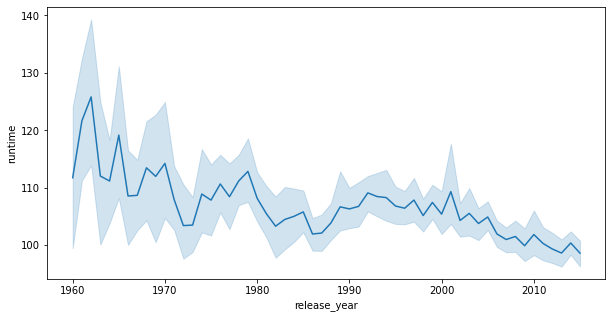

In [9]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, y='runtime',x='release_year' );#technique taken from Texas Mccombs school of business

**Majority of the movies produced in recent time had runtime reduced, this was probably in a bit to capture the attention of the audience and not make it excessively long and boring**

### lets see the correlation between vote_average and release year of movies

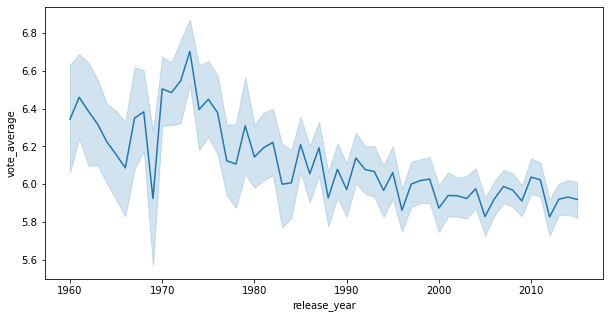

In [8]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, y='vote_average',x='release_year' );#technique taken from Texas Mccombs school of business

**The average votes for movies gradually declined overtime**

<a id='conclusions'></a>
## Conclusions

**Paramount pictures have generated the highest revenue till date**

**A total of 3951 directors have been involved in all the movies produced from 1960 till date**

**The most popular genre is the thriller which might be suggestive of the fact that people enjoy it a lot as compared to others necessitating the need to produce more of thriller related movies**

**Amongst other companies, kilburn media has not generated a single revenue till date.**

**runtime and vote_average were seen to be decreasing as release year was becoming more recent**

